In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from numpy import mean, std, absolute
from keras.regularizers import l2


In [57]:
# import dataset using pandas and convert to array for processing
dataset = pd.read_csv('Data.csv')
dataset

,Height,Weight,Age,Gender,EE,HRmax,VO2max
0,188.0,78.4,32,M,17.580220,163.500000,44.847500
1,175.0,59.0,22,F,14.239469,189.400000,48.269388
2,170.0,58.1,23,F,12.081421,162.700000,41.588370
3,168.5,54.0,30,F,12.164488,182.300000,45.053660
4,191.0,98.6,30,M,19.572100,198.537406,39.700000
5,178.0,63.0,26,F,13.341879,154.300000,42.355170
6,176.7,82.0,27,M,16.079811,199.800000,39.219050
7,177.4,66.3,29,F,14.250177,151.200000,42.986960
8,162.6,57.3,25,F,11.789054,173.354021,41.148530
9,178.0,89.2,27,M,19.162771,186.564176,42.965854


In [58]:
# train dataset (omit variables for different number of predictor variables) Independent variables
train = dataset[['Height', 'Weight', 'Age','Gender','EE','HRmax']].values
train.shape
train

array([[188.0, 78.4, 32, 'M', 17.58022, 163.5],
       [175.0, 59.0, 22, 'F', 14.23946939, 189.4],
       [170.0, 58.1, 23, 'F', 12.08142149, 162.7],
       [168.5, 54.0, 30, 'F', 12.1644882, 182.3],
       [191.0, 98.6, 30, 'M', 19.5721, 198.5374064],
       [178.0, 63.0, 26, 'F', 13.34187855, 154.3],
       [176.7, 82.0, 27, 'M', 16.0798105, 199.8],
       [177.4, 66.3, 29, 'F', 14.25017724, 151.2],
       [162.6, 57.3, 25, 'F', 11.78905385, 173.35402130000003],
       [178.0, 89.2, 27, 'M', 19.16277073, 186.5641757],
       [174.0, 67.5, 22, 'F', 12.91275, 168.46162980000003],
       [179.8, 73.9, 29, 'M', 15.81077937, 156.57106069999998],
       [179.0, 79.0, 29, 'M', 16.50274845, 190.9],
       [168.8, 78.3, 23, 'F', 13.01552712, 175.84343909999998],
       [175.1, 72.4, 29, 'F', 17.75458552, 188.66200569999998],
       [182.0, 77.0, 34, 'M', 16.912102899999997, 188.8450593],
       [187.5, 85.5, 34, 'M', 18.14679788, 152.75951630000003],
       [164.8, 85.6, 30, 'M', 16.344036, 1

In [59]:
# Test data set - Dependent Variable
test = dataset[['VO2max']].values
test

array([[44.8475    ],
       [48.26938776],
       [41.58837   ],
       [45.05366   ],
       [39.7       ],
       [42.35517   ],
       [39.21905   ],
       [42.98696   ],
       [41.14853   ],
       [42.96585366],
       [38.26      ],
       [42.78966   ],
       [41.77911   ],
       [33.24528   ],
       [45.29231   ],
       [43.92754   ],
       [42.44865   ],
       [38.187     ]])

In [ ]:
###### labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column (Column Gender) 1 - Males, 0 - Females
train[:,3] = np.array(labelencoder.fit_transform(train[:,3]))
train
# normalize values mean =0 and variance = 1
train = normalize(train)
train

In [69]:
# split into test train 
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.33) # splits data randomly everytime 
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [71]:
##### Neural Network with 1 hidden, 1 input and 1 output layer 5000 epoch batch size 10
model = Sequential() # 
model.add(Dense(32 , kernel_initializer='normal', activation = 'elu', input_shape = (train.shape[1],)))
model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))
opt=Adam(learning_rate=0.02) # learning rate =0.02
model.compile(optimizer = opt, loss = 'mean_squared_logarithmic_error')
history=model.fit(x = X_train, y = y_train, epochs = 5000, batch_size=17,validation_data=(X_test, y_test))

Epoch 1/5000
1/1 [==============================] - 0s 240ms/step - loss: 14.0424 - val_loss: 12.3644
Epoch 2/5000
1/1 [==============================] - 0s 35ms/step - loss: 12.1786 - val_loss: 10.5168
Epoch 3/5000
1/1 [==============================] - 0s 49ms/step - loss: 10.3476 - val_loss: 8.5490
Epoch 4/5000
1/1 [==============================] - 0s 58ms/step - loss: 8.3988 - val_loss: 6.7409
Epoch 5/5000
1/1 [==============================] - 0s 56ms/step - loss: 6.6095 - val_loss: 5.2230
Epoch 6/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.1088 - val_loss: 4.0046
Epoch 7/5000
1/1 [==============================] - 0s 64ms/step - loss: 3.9057 - val_loss: 3.0453
Epoch 8/5000
1/1 [==============================] - 0s 60ms/step - loss: 2.9601 - val_loss: 2.2955
Epoch 9/5000
1/1 [==============================] - 0s 59ms/step - loss: 2.2225 - val_loss: 1.7111
Epoch 10/5000
1/1 [==============================] - 0s 62ms/step - loss: 1.6490 - val_loss: 1.2571
Epo

Epoch 83/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0092 - val_loss: 0.0057
Epoch 84/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0090 - val_loss: 0.0053
Epoch 85/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 86/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 87/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 88/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0084 - val_loss: 0.0041
Epoch 89/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 90/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0082 - val_loss: 0.0036
Epoch 91/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0082 - val_loss: 0.0035
Epoch 92/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0082 - val_loss: 0.0033


1/1 [==============================] - 0s 30ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 165/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 166/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 167/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 168/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 169/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 170/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 171/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch 172/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch 173/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch

1/1 [==============================] - 0s 52ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 246/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 247/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 248/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 249/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 250/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 251/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 252/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 253/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 254/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 37ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 327/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 328/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 329/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 330/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 331/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 332/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 333/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 334/5000
1/1 [==============================] - 0s 66ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 335/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 408/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 409/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 410/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 411/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 412/5000
1/1 [==============================] - 0s 67ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 413/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 414/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 415/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 416/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 489/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 490/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 491/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 492/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 493/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 494/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 495/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 496/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 497/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 39ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 570/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 571/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 572/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 573/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 574/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 575/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 576/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 577/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 578/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 68ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 651/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 652/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 653/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 654/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 655/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 656/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 657/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 658/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 659/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 31ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 732/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 733/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 734/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 735/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 736/5000
1/1 [==============================] - 0s 100ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 737/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 738/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 739/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 740/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - val_loss: 0.0033
Epoc

1/1 [==============================] - 0s 37ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 813/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 814/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 815/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 816/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 817/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 818/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 819/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 820/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 821/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 894/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 895/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 896/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 897/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 898/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 899/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 900/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 901/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 902/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch

1/1 [==============================] - 0s 42ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 975/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 976/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 977/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 978/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 979/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 980/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 981/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 982/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 983/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1055/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1056/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1057/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1058/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1059/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1060/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1061/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1062/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 1063/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0073 - val_loss: 0.0

1/1 [==============================] - 0s 29ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1135/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1136/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1137/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1138/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1139/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1140/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1141/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1142/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 1143/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0072 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1215/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1216/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1217/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1218/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1219/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1220/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1221/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1222/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 1223/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0071 - val_loss: 0.0

1/1 [==============================] - 0s 27ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1295/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1296/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1297/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1298/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1299/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1300/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1301/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1302/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 1303/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0069 - val_loss: 0.0

1/1 [==============================] - 0s 43ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1375/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1376/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1377/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1378/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1379/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1380/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1381/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1382/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1383/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0067 - val_loss: 0.0

1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1455/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1456/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1457/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1458/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1459/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1460/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1461/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1462/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 1463/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0065 - val_loss: 0.0

1/1 [==============================] - 0s 42ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1535/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1536/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1537/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1538/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1539/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1540/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1541/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1542/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 1543/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0062 - val_loss: 0.0

1/1 [==============================] - 0s 33ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1615/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1616/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1617/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1618/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1619/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1620/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1621/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1622/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 1623/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0059 - val_loss: 0.0

1/1 [==============================] - 0s 28ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1695/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1696/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1697/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1698/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1699/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1700/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1701/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1702/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 1703/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0055 - val_loss: 0.0

1/1 [==============================] - 0s 28ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 1775/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1776/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1777/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1778/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1779/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1780/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1781/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1782/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 1783/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0050 - val_loss: 0.0

1/1 [==============================] - 0s 29ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1855/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1856/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1857/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1858/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1859/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1860/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1861/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 1862/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 1863/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0045 - val_loss: 0.0

1/1 [==============================] - 0s 72ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1935/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1936/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1937/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1938/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1939/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1940/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1941/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1942/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 1943/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0041 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 2015/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 2016/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 2017/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 2018/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 2019/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 2020/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 2021/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 2022/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 2023/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - val_loss: 0.0

1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2095/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2096/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2097/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2098/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2099/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 2100/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 2101/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 2102/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 2103/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0032 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2175/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2176/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2177/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2178/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2179/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2180/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2181/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2182/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2183/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0027 - val_loss: 0.0

1/1 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 2255/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 2256/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 2257/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 2258/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2259/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2260/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2261/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2262/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2263/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0022 - val_loss: 0.0

1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 2335/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 2336/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2337/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2338/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2339/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2340/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2341/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2342/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 2343/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0

1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2415/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2416/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2417/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2418/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2419/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2420/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2421/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2422/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2423/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 0.0

1/1 [==============================] - 0s 74ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2495/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2496/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2497/5000
1/1 [==============================] - 0s 88ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2498/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2499/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2500/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2501/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2502/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2503/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0012 - val_loss: 0.0

1/1 [==============================] - 0s 35ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2575/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2576/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2577/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2578/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2579/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2580/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2581/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2582/5000
1/1 [==============================] - 0s 94ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2583/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0010 - val_loss: 0.0

1/1 [==============================] - 0s 38ms/step - loss: 8.4590e-04 - val_loss: 8.6931e-04
Epoch 2651/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.4367e-04 - val_loss: 8.6607e-04
Epoch 2652/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.4144e-04 - val_loss: 8.6283e-04
Epoch 2653/5000
1/1 [==============================] - 0s 38ms/step - loss: 8.3922e-04 - val_loss: 8.5960e-04
Epoch 2654/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.3700e-04 - val_loss: 8.5639e-04
Epoch 2655/5000
1/1 [==============================] - 0s 47ms/step - loss: 8.3478e-04 - val_loss: 8.5316e-04
Epoch 2656/5000
1/1 [==============================] - 0s 50ms/step - loss: 8.3257e-04 - val_loss: 8.4996e-04
Epoch 2657/5000
1/1 [==============================] - 0s 52ms/step - loss: 8.3036e-04 - val_loss: 8.4676e-04
Epoch 2658/5000
1/1 [==============================] - 0s 50ms/step - loss: 8.2816e-04 - val_loss: 8.4357e-04
Epoch 2659/5000
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 6.9102e-04 - val_loss: 6.4925e-04
Epoch 2725/5000
1/1 [==============================] - 0s 33ms/step - loss: 6.8908e-04 - val_loss: 6.4659e-04
Epoch 2726/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.8713e-04 - val_loss: 6.4393e-04
Epoch 2727/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.8519e-04 - val_loss: 6.4129e-04
Epoch 2728/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.8326e-04 - val_loss: 6.3865e-04
Epoch 2729/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.8132e-04 - val_loss: 6.3602e-04
Epoch 2730/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.7940e-04 - val_loss: 6.3340e-04
Epoch 2731/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.7748e-04 - val_loss: 6.3079e-04
Epoch 2732/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.7556e-04 - val_loss: 6.2819e-04
Epoch 2733/5000
1/1 [=====

1/1 [==============================] - 0s 31ms/step - loss: 5.5842e-04 - val_loss: 4.7834e-04
Epoch 2799/5000
1/1 [==============================] - 0s 30ms/step - loss: 5.5679e-04 - val_loss: 4.7642e-04
Epoch 2800/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.5517e-04 - val_loss: 4.7450e-04
Epoch 2801/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.5356e-04 - val_loss: 4.7259e-04
Epoch 2802/5000
1/1 [==============================] - 0s 32ms/step - loss: 5.5195e-04 - val_loss: 4.7070e-04
Epoch 2803/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.5034e-04 - val_loss: 4.6882e-04
Epoch 2804/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.4873e-04 - val_loss: 4.6695e-04
Epoch 2805/5000
1/1 [==============================] - 0s 35ms/step - loss: 5.4713e-04 - val_loss: 4.6508e-04
Epoch 2806/5000
1/1 [==============================] - 0s 38ms/step - loss: 5.4554e-04 - val_loss: 4.6323e-04
Epoch 2807/5000
1/1 [=====

1/1 [==============================] - 0s 36ms/step - loss: 4.5067e-04 - val_loss: 3.6484e-04
Epoch 2873/5000
1/1 [==============================] - 0s 36ms/step - loss: 4.4939e-04 - val_loss: 3.6370e-04
Epoch 2874/5000
1/1 [==============================] - 0s 36ms/step - loss: 4.4811e-04 - val_loss: 3.6258e-04
Epoch 2875/5000
1/1 [==============================] - 0s 32ms/step - loss: 4.4685e-04 - val_loss: 3.6147e-04
Epoch 2876/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.4558e-04 - val_loss: 3.6037e-04
Epoch 2877/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.4432e-04 - val_loss: 3.5928e-04
Epoch 2878/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.4306e-04 - val_loss: 3.5820e-04
Epoch 2879/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.4182e-04 - val_loss: 3.5713e-04
Epoch 2880/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.4057e-04 - val_loss: 3.5607e-04
Epoch 2881/5000
1/1 [=====

1/1 [==============================] - 0s 31ms/step - loss: 3.6873e-04 - val_loss: 3.0816e-04
Epoch 2947/5000
1/1 [==============================] - 0s 29ms/step - loss: 3.6779e-04 - val_loss: 3.0775e-04
Epoch 2948/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.6686e-04 - val_loss: 3.0736e-04
Epoch 2949/5000
1/1 [==============================] - 0s 30ms/step - loss: 3.6593e-04 - val_loss: 3.0696e-04
Epoch 2950/5000
1/1 [==============================] - 0s 29ms/step - loss: 3.6501e-04 - val_loss: 3.0658e-04
Epoch 2951/5000
1/1 [==============================] - 0s 30ms/step - loss: 3.6409e-04 - val_loss: 3.0620e-04
Epoch 2952/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.6318e-04 - val_loss: 3.0583e-04
Epoch 2953/5000
1/1 [==============================] - 0s 37ms/step - loss: 3.6227e-04 - val_loss: 3.0547e-04
Epoch 2954/5000
1/1 [==============================] - 0s 43ms/step - loss: 3.6137e-04 - val_loss: 3.0513e-04
Epoch 2955/5000
1/1 [=====

1/1 [==============================] - 0s 37ms/step - loss: 3.1095e-04 - val_loss: 2.9910e-04
Epoch 3021/5000
1/1 [==============================] - 0s 33ms/step - loss: 3.1032e-04 - val_loss: 2.9924e-04
Epoch 3022/5000
1/1 [==============================] - 0s 32ms/step - loss: 3.0969e-04 - val_loss: 2.9939e-04
Epoch 3023/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.0907e-04 - val_loss: 2.9953e-04
Epoch 3024/5000
1/1 [==============================] - 0s 35ms/step - loss: 3.0845e-04 - val_loss: 2.9970e-04
Epoch 3025/5000
1/1 [==============================] - 0s 42ms/step - loss: 3.0783e-04 - val_loss: 2.9984e-04
Epoch 3026/5000
1/1 [==============================] - 0s 37ms/step - loss: 3.0722e-04 - val_loss: 3.0002e-04
Epoch 3027/5000
1/1 [==============================] - 0s 37ms/step - loss: 3.0661e-04 - val_loss: 3.0020e-04
Epoch 3028/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.0600e-04 - val_loss: 3.0036e-04
Epoch 3029/5000
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 2.7338e-04 - val_loss: 3.2269e-04
Epoch 3095/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.7299e-04 - val_loss: 3.2317e-04
Epoch 3096/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.7260e-04 - val_loss: 3.2363e-04
Epoch 3097/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.7221e-04 - val_loss: 3.2412e-04
Epoch 3098/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.7183e-04 - val_loss: 3.2458e-04
Epoch 3099/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.7144e-04 - val_loss: 3.2506e-04
Epoch 3100/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.7106e-04 - val_loss: 3.2555e-04
Epoch 3101/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.7069e-04 - val_loss: 3.2602e-04
Epoch 3102/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.7031e-04 - val_loss: 3.2651e-04
Epoch 3103/5000
1/1 [=====

1/1 [==============================] - 0s 35ms/step - loss: 2.5085e-04 - val_loss: 3.6282e-04
Epoch 3169/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.5063e-04 - val_loss: 3.6342e-04
Epoch 3170/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.5040e-04 - val_loss: 3.6400e-04
Epoch 3171/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.5019e-04 - val_loss: 3.6459e-04
Epoch 3172/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.4996e-04 - val_loss: 3.6520e-04
Epoch 3173/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.4975e-04 - val_loss: 3.6577e-04
Epoch 3174/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.4953e-04 - val_loss: 3.6638e-04
Epoch 3175/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.4932e-04 - val_loss: 3.6696e-04
Epoch 3176/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4910e-04 - val_loss: 3.6756e-04
Epoch 3177/5000
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 2.3836e-04 - val_loss: 4.0622e-04
Epoch 3243/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.3823e-04 - val_loss: 4.0697e-04
Epoch 3244/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.3812e-04 - val_loss: 4.0733e-04
Epoch 3245/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.3800e-04 - val_loss: 4.0812e-04
Epoch 3246/5000
1/1 [==============================] - 0s 44ms/step - loss: 2.3788e-04 - val_loss: 4.0842e-04
Epoch 3247/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.3777e-04 - val_loss: 4.0931e-04
Epoch 3248/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.3765e-04 - val_loss: 4.0948e-04
Epoch 3249/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3754e-04 - val_loss: 4.1052e-04
Epoch 3250/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.3743e-04 - val_loss: 4.1047e-04
Epoch 3251/5000
1/1 [=====

1/1 [==============================] - 0s 60ms/step - loss: 2.3226e-04 - val_loss: 4.5155e-04
Epoch 3317/5000
1/1 [==============================] - 0s 52ms/step - loss: 2.3260e-04 - val_loss: 4.2832e-04
Epoch 3318/5000
1/1 [==============================] - 0s 47ms/step - loss: 2.3301e-04 - val_loss: 4.5573e-04
Epoch 3319/5000
1/1 [==============================] - 0s 51ms/step - loss: 2.3278e-04 - val_loss: 4.3639e-04
Epoch 3320/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.3221e-04 - val_loss: 4.4115e-04
Epoch 3321/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.3199e-04 - val_loss: 4.5237e-04
Epoch 3322/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.3224e-04 - val_loss: 4.3296e-04
Epoch 3323/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.3241e-04 - val_loss: 4.5404e-04
Epoch 3324/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.3219e-04 - val_loss: 4.4054e-04
Epoch 3325/5000
1/1 [=====

1/1 [==============================] - 0s 62ms/step - loss: 2.2912e-04 - val_loss: 4.6812e-04
Epoch 3391/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2909e-04 - val_loss: 4.6885e-04
Epoch 3392/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2906e-04 - val_loss: 4.6908e-04
Epoch 3393/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2903e-04 - val_loss: 4.6919e-04
Epoch 3394/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2901e-04 - val_loss: 4.6996e-04
Epoch 3395/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.2898e-04 - val_loss: 4.6972e-04
Epoch 3396/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.2895e-04 - val_loss: 4.7059e-04
Epoch 3397/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2892e-04 - val_loss: 4.7049e-04
Epoch 3398/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2889e-04 - val_loss: 4.7102e-04
Epoch 3399/5000
1/1 [=====

1/1 [==============================] - 0s 36ms/step - loss: 2.2751e-04 - val_loss: 4.8926e-04
Epoch 3465/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.2750e-04 - val_loss: 4.8951e-04
Epoch 3466/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2748e-04 - val_loss: 4.8973e-04
Epoch 3467/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2746e-04 - val_loss: 4.8999e-04
Epoch 3468/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.2745e-04 - val_loss: 4.9019e-04
Epoch 3469/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2743e-04 - val_loss: 4.9047e-04
Epoch 3470/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.2742e-04 - val_loss: 4.9066e-04
Epoch 3471/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.2741e-04 - val_loss: 4.9093e-04
Epoch 3472/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2739e-04 - val_loss: 4.9112e-04
Epoch 3473/5000
1/1 [=====

1/1 [==============================] - 0s 53ms/step - loss: 2.5051e-04 - val_loss: 4.6594e-04
Epoch 3539/5000
1/1 [==============================] - 0s 53ms/step - loss: 2.3451e-04 - val_loss: 5.0665e-04
Epoch 3540/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.2673e-04 - val_loss: 5.4461e-04
Epoch 3541/5000
1/1 [==============================] - 0s 53ms/step - loss: 2.3169e-04 - val_loss: 4.5660e-04
Epoch 3542/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.4083e-04 - val_loss: 5.8638e-04
Epoch 3543/5000
1/1 [==============================] - 0s 55ms/step - loss: 2.4369e-04 - val_loss: 4.6243e-04
Epoch 3544/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.3683e-04 - val_loss: 5.2946e-04
Epoch 3545/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2872e-04 - val_loss: 5.1432e-04
Epoch 3546/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.2701e-04 - val_loss: 4.7352e-04
Epoch 3547/5000
1/1 [=====

1/1 [==============================] - 0s 49ms/step - loss: 2.2632e-04 - val_loss: 5.1372e-04
Epoch 3613/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2632e-04 - val_loss: 5.1031e-04
Epoch 3614/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2632e-04 - val_loss: 5.1368e-04
Epoch 3615/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2631e-04 - val_loss: 5.1136e-04
Epoch 3616/5000
1/1 [==============================] - 0s 52ms/step - loss: 2.2630e-04 - val_loss: 5.1261e-04
Epoch 3617/5000
1/1 [==============================] - 0s 53ms/step - loss: 2.2629e-04 - val_loss: 5.1290e-04
Epoch 3618/5000
1/1 [==============================] - 0s 57ms/step - loss: 2.2629e-04 - val_loss: 5.1162e-04
Epoch 3619/5000
1/1 [==============================] - 0s 59ms/step - loss: 2.2628e-04 - val_loss: 5.1389e-04
Epoch 3620/5000
1/1 [==============================] - 0s 57ms/step - loss: 2.2628e-04 - val_loss: 5.1150e-04
Epoch 3621/5000
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 2.2606e-04 - val_loss: 5.1799e-04
Epoch 3687/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2606e-04 - val_loss: 5.1802e-04
Epoch 3688/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2606e-04 - val_loss: 5.1811e-04
Epoch 3689/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2606e-04 - val_loss: 5.1815e-04
Epoch 3690/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2605e-04 - val_loss: 5.1823e-04
Epoch 3691/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2605e-04 - val_loss: 5.1830e-04
Epoch 3692/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2605e-04 - val_loss: 5.1833e-04
Epoch 3693/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.2605e-04 - val_loss: 5.1843e-04
Epoch 3694/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2605e-04 - val_loss: 5.1845e-04
Epoch 3695/5000
1/1 [=====

1/1 [==============================] - 0s 31ms/step - loss: 2.9623e-04 - val_loss: 4.5057e-04
Epoch 3761/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.0028e-04 - val_loss: 7.1649e-04
Epoch 3762/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.9314e-04 - val_loss: 4.5632e-04
Epoch 3763/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.6563e-04 - val_loss: 5.9138e-04
Epoch 3764/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.3868e-04 - val_loss: 5.1609e-04
Epoch 3765/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2603e-04 - val_loss: 4.8571e-04
Epoch 3766/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.3277e-04 - val_loss: 6.2020e-04
Epoch 3767/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.4875e-04 - val_loss: 4.6012e-04
Epoch 3768/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.5738e-04 - val_loss: 6.3057e-04
Epoch 3769/5000
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 2.2583e-04 - val_loss: 5.1975e-04
Epoch 3835/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.2583e-04 - val_loss: 5.2537e-04
Epoch 3836/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.2583e-04 - val_loss: 5.2094e-04
Epoch 3837/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.2581e-04 - val_loss: 5.2346e-04
Epoch 3838/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2580e-04 - val_loss: 5.2321e-04
Epoch 3839/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2579e-04 - val_loss: 5.2143e-04
Epoch 3840/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2580e-04 - val_loss: 5.2477e-04
Epoch 3841/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2581e-04 - val_loss: 5.2074e-04
Epoch 3842/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2580e-04 - val_loss: 5.2471e-04
Epoch 3843/5000
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 2.2570e-04 - val_loss: 5.2388e-04
Epoch 3909/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.2570e-04 - val_loss: 5.2376e-04
Epoch 3910/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.2570e-04 - val_loss: 5.2394e-04
Epoch 3911/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.2570e-04 - val_loss: 5.2376e-04
Epoch 3912/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2570e-04 - val_loss: 5.2398e-04
Epoch 3913/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2569e-04 - val_loss: 5.2377e-04
Epoch 3914/5000
1/1 [==============================] - 0s 44ms/step - loss: 2.2569e-04 - val_loss: 5.2401e-04
Epoch 3915/5000
1/1 [==============================] - 0s 47ms/step - loss: 2.2569e-04 - val_loss: 5.2379e-04
Epoch 3916/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2569e-04 - val_loss: 5.2401e-04
Epoch 3917/5000
1/1 [=====

1/1 [==============================] - 0s 38ms/step - loss: 2.5966e-04 - val_loss: 4.5720e-04
Epoch 3983/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.7248e-04 - val_loss: 7.1026e-04
Epoch 3984/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.8852e-04 - val_loss: 4.5404e-04
Epoch 3985/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.9578e-04 - val_loss: 7.2454e-04
Epoch 3986/5000
1/1 [==============================] - 0s 68ms/step - loss: 2.9603e-04 - val_loss: 4.5636e-04
Epoch 3987/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.7643e-04 - val_loss: 6.3024e-04
Epoch 3988/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.5153e-04 - val_loss: 4.9243e-04
Epoch 3989/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.3079e-04 - val_loss: 5.1408e-04
Epoch 3990/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2604e-04 - val_loss: 5.8473e-04
Epoch 3991/5000
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 2.2554e-04 - val_loss: 5.2548e-04
Epoch 4057/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2555e-04 - val_loss: 5.2080e-04
Epoch 4058/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2557e-04 - val_loss: 5.2654e-04
Epoch 4059/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2557e-04 - val_loss: 5.2079e-04
Epoch 4060/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2556e-04 - val_loss: 5.2560e-04
Epoch 4061/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2555e-04 - val_loss: 5.2237e-04
Epoch 4062/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2554e-04 - val_loss: 5.2364e-04
Epoch 4063/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2553e-04 - val_loss: 5.2433e-04
Epoch 4064/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2553e-04 - val_loss: 5.2199e-04
Epoch 4065/5000
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 2.2546e-04 - val_loss: 5.2347e-04
Epoch 4131/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.2546e-04 - val_loss: 5.2360e-04
Epoch 4132/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.2546e-04 - val_loss: 5.2347e-04
Epoch 4133/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2546e-04 - val_loss: 5.2359e-04
Epoch 4134/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2545e-04 - val_loss: 5.2347e-04
Epoch 4135/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2545e-04 - val_loss: 5.2358e-04
Epoch 4136/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2545e-04 - val_loss: 5.2350e-04
Epoch 4137/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2545e-04 - val_loss: 5.2356e-04
Epoch 4138/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2545e-04 - val_loss: 5.2351e-04
Epoch 4139/5000
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 2.6290e-04 - val_loss: 4.7061e-04
Epoch 4205/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4487e-04 - val_loss: 5.5554e-04
Epoch 4206/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.2874e-04 - val_loss: 5.3954e-04
Epoch 4207/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.2633e-04 - val_loss: 4.8098e-04
Epoch 4208/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.3593e-04 - val_loss: 6.1350e-04
Epoch 4209/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.4557e-04 - val_loss: 4.7103e-04
Epoch 4210/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.4433e-04 - val_loss: 5.8187e-04
Epoch 4211/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.3513e-04 - val_loss: 5.0630e-04
Epoch 4212/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.2663e-04 - val_loss: 5.0803e-04
Epoch 4213/5000
1/1 [=====

1/1 [==============================] - 0s 35ms/step - loss: 2.2533e-04 - val_loss: 5.2058e-04
Epoch 4279/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.2532e-04 - val_loss: 5.2261e-04
Epoch 4280/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2531e-04 - val_loss: 5.2227e-04
Epoch 4281/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.2531e-04 - val_loss: 5.2102e-04
Epoch 4282/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2531e-04 - val_loss: 5.2347e-04
Epoch 4283/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2532e-04 - val_loss: 5.2038e-04
Epoch 4284/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2532e-04 - val_loss: 5.2352e-04
Epoch 4285/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2531e-04 - val_loss: 5.2089e-04
Epoch 4286/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2531e-04 - val_loss: 5.2257e-04
Epoch 4287/5000
1/1 [=====

1/1 [==============================] - 0s 48ms/step - loss: 2.2524e-04 - val_loss: 5.2199e-04
Epoch 4353/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.2524e-04 - val_loss: 5.2201e-04
Epoch 4354/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.2524e-04 - val_loss: 5.2204e-04
Epoch 4355/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.2523e-04 - val_loss: 5.2197e-04
Epoch 4356/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.2523e-04 - val_loss: 5.2207e-04
Epoch 4357/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.2523e-04 - val_loss: 5.2195e-04
Epoch 4358/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.2523e-04 - val_loss: 5.2208e-04
Epoch 4359/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.2523e-04 - val_loss: 5.2195e-04
Epoch 4360/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.2523e-04 - val_loss: 5.2207e-04
Epoch 4361/5000
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 2.9813e-04 - val_loss: 4.5344e-04
Epoch 4427/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.1644e-04 - val_loss: 7.8648e-04
Epoch 4428/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3250e-04 - val_loss: 4.5378e-04
Epoch 4429/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.1914e-04 - val_loss: 7.1180e-04
Epoch 4430/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.9082e-04 - val_loss: 4.6499e-04
Epoch 4431/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.5039e-04 - val_loss: 5.4547e-04
Epoch 4432/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.2705e-04 - val_loss: 5.6084e-04
Epoch 4433/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.2989e-04 - val_loss: 4.6564e-04
Epoch 4434/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.4948e-04 - val_loss: 6.6408e-04
Epoch 4435/5000
1/1 [=====

1/1 [==============================] - 0s 46ms/step - loss: 2.2511e-04 - val_loss: 5.2008e-04
Epoch 4501/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.2509e-04 - val_loss: 5.2221e-04
Epoch 4502/5000
1/1 [==============================] - 0s 69ms/step - loss: 2.2511e-04 - val_loss: 5.1767e-04
Epoch 4503/5000
1/1 [==============================] - 0s 77ms/step - loss: 2.2512e-04 - val_loss: 5.2357e-04
Epoch 4504/5000
1/1 [==============================] - 0s 65ms/step - loss: 2.2513e-04 - val_loss: 5.1758e-04
Epoch 4505/5000
1/1 [==============================] - 0s 63ms/step - loss: 2.2512e-04 - val_loss: 5.2252e-04
Epoch 4506/5000
1/1 [==============================] - 0s 62ms/step - loss: 2.2511e-04 - val_loss: 5.1941e-04
Epoch 4507/5000
1/1 [==============================] - 0s 55ms/step - loss: 2.2510e-04 - val_loss: 5.2029e-04
Epoch 4508/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2509e-04 - val_loss: 5.2157e-04
Epoch 4509/5000
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 2.2502e-04 - val_loss: 5.2049e-04
Epoch 4575/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2502e-04 - val_loss: 5.2059e-04
Epoch 4576/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2502e-04 - val_loss: 5.2050e-04
Epoch 4577/5000
1/1 [==============================] - 0s 37ms/step - loss: 2.2502e-04 - val_loss: 5.2060e-04
Epoch 4578/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.2502e-04 - val_loss: 5.2051e-04
Epoch 4579/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.2502e-04 - val_loss: 5.2059e-04
Epoch 4580/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2502e-04 - val_loss: 5.2054e-04
Epoch 4581/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.2502e-04 - val_loss: 5.2055e-04
Epoch 4582/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.2502e-04 - val_loss: 5.2058e-04
Epoch 4583/5000
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 2.6196e-04 - val_loss: 4.5328e-04
Epoch 4649/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.7902e-04 - val_loss: 7.3538e-04
Epoch 4650/5000
1/1 [==============================] - 0s 29ms/step - loss: 3.0406e-04 - val_loss: 4.5337e-04
Epoch 4651/5000
1/1 [==============================] - 0s 30ms/step - loss: 3.2386e-04 - val_loss: 8.0160e-04
Epoch 4652/5000
1/1 [==============================] - 0s 30ms/step - loss: 3.4239e-04 - val_loss: 4.5426e-04
Epoch 4653/5000
1/1 [==============================] - 0s 30ms/step - loss: 3.2967e-04 - val_loss: 7.3010e-04
Epoch 4654/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.0133e-04 - val_loss: 4.6005e-04
Epoch 4655/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.5702e-04 - val_loss: 5.5516e-04
Epoch 4656/5000
1/1 [==============================] - 0s 33ms/step - loss: 2.2879e-04 - val_loss: 5.5108e-04
Epoch 4657/5000
1/1 [=====

1/1 [==============================] - 0s 31ms/step - loss: 2.2495e-04 - val_loss: 5.2335e-04
Epoch 4723/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.2496e-04 - val_loss: 5.1536e-04
Epoch 4724/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2494e-04 - val_loss: 5.2152e-04
Epoch 4725/5000
1/1 [==============================] - 0s 39ms/step - loss: 2.2491e-04 - val_loss: 5.1806e-04
Epoch 4726/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2489e-04 - val_loss: 5.1842e-04
Epoch 4727/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.2488e-04 - val_loss: 5.2093e-04
Epoch 4728/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.2490e-04 - val_loss: 5.1633e-04
Epoch 4729/5000
1/1 [==============================] - 0s 43ms/step - loss: 2.2491e-04 - val_loss: 5.2206e-04
Epoch 4730/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.2491e-04 - val_loss: 5.1633e-04
Epoch 4731/5000
1/1 [=====

1/1 [==============================] - 0s 36ms/step - loss: 2.2481e-04 - val_loss: 5.1942e-04
Epoch 4797/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.2481e-04 - val_loss: 5.1919e-04
Epoch 4798/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2481e-04 - val_loss: 5.1941e-04
Epoch 4799/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.2481e-04 - val_loss: 5.1923e-04
Epoch 4800/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2481e-04 - val_loss: 5.1937e-04
Epoch 4801/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2481e-04 - val_loss: 5.1929e-04
Epoch 4802/5000
1/1 [==============================] - 0s 32ms/step - loss: 2.2481e-04 - val_loss: 5.1933e-04
Epoch 4803/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.2481e-04 - val_loss: 5.1934e-04
Epoch 4804/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.2481e-04 - val_loss: 5.1929e-04
Epoch 4805/5000
1/1 [=====

1/1 [==============================] - 0s 55ms/step - loss: 2.2936e-04 - val_loss: 4.8238e-04
Epoch 4871/5000
1/1 [==============================] - 0s 44ms/step - loss: 2.3249e-04 - val_loss: 5.8966e-04
Epoch 4872/5000
1/1 [==============================] - 0s 41ms/step - loss: 2.3800e-04 - val_loss: 4.6518e-04
Epoch 4873/5000
1/1 [==============================] - 0s 35ms/step - loss: 2.4675e-04 - val_loss: 6.5115e-04
Epoch 4874/5000
1/1 [==============================] - 0s 38ms/step - loss: 2.6208e-04 - val_loss: 4.5176e-04
Epoch 4875/5000
1/1 [==============================] - 0s 36ms/step - loss: 2.8380e-04 - val_loss: 7.6125e-04
Epoch 4876/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.1921e-04 - val_loss: 4.5811e-04
Epoch 4877/5000
1/1 [==============================] - 0s 46ms/step - loss: 3.5443e-04 - val_loss: 8.8590e-04
Epoch 4878/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.9624e-04 - val_loss: 4.6837e-04
Epoch 4879/5000
1/1 [=====

1/1 [==============================] - 0s 49ms/step - loss: 2.2471e-04 - val_loss: 5.1234e-04
Epoch 4945/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2479e-04 - val_loss: 5.2336e-04
Epoch 4946/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.2483e-04 - val_loss: 5.1211e-04
Epoch 4947/5000
1/1 [==============================] - 0s 42ms/step - loss: 2.2479e-04 - val_loss: 5.2058e-04
Epoch 4948/5000
1/1 [==============================] - 0s 54ms/step - loss: 2.2473e-04 - val_loss: 5.1666e-04
Epoch 4949/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2468e-04 - val_loss: 5.1540e-04
Epoch 4950/5000
1/1 [==============================] - 0s 46ms/step - loss: 2.2469e-04 - val_loss: 5.2106e-04
Epoch 4951/5000
1/1 [==============================] - 0s 57ms/step - loss: 2.2473e-04 - val_loss: 5.1299e-04
Epoch 4952/5000
1/1 [==============================] - 0s 63ms/step - loss: 2.2475e-04 - val_loss: 5.2129e-04
Epoch 4953/5000
1/1 [=====

In [72]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=17) 
print("test loss", results)

Evaluate on test data
1/1 [==============================] - 0s 2ms/step - loss: 5.1740e-04
test loss 0.000517401669640094


In [73]:
# Predict VO2max values for test set
y_pred = model.predict(X_test)
y_pred

array([[43.443882],
       [45.35272 ],
       [43.995   ],
       [42.4247  ],
       [43.074074],
       [39.350513]], dtype=float32)

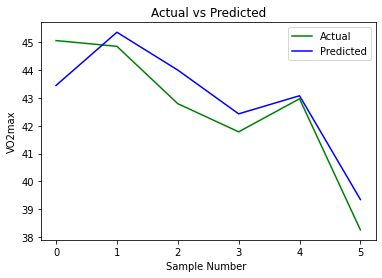

In [74]:
#Visualising the Actual and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [75]:
print("mean squared error: ", mean_squared_error(y_test, y_pred)) #compute MSE
print("r_square score: ", r2_score(y_test, y_pred)) # compute R2 score (accuracy for regression tasks or continuous data)

mean squared error:  0.98619956
r_square score:  0.8075675436395495


In [76]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.49524
mean_error:  0.8607769
min_error:  0.10821915
max_error:  1.6097794


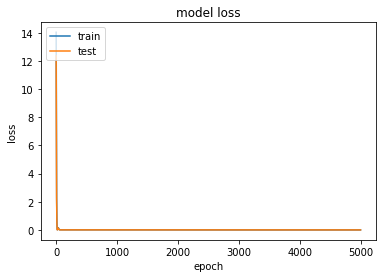

In [77]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()